`Dynamic Time Warping`

In [2]:
# import necessary libs
from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial.distance as dist

`Dynamic Programming function`

In [3]:
def dp(dist_matrix):
    
    N, M = dist_matrix.shape

    # extract dimensionality -> Initialize the cost matrix
    cost_matrix = np.zeros((N+1, M+1))
    for i in range(1, N+1):
        cost_matrix[i,0] = np.inf 
    for i in range(1, M+1):
        cost_matrix[0,i] = np.inf 


    # Flll the cost matrix while keepng the traceback information
    traceback_matrix = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            penalty = [
                cost_matrix[i, j], # match(0)
                cost_matrix[i, j+1], # insertion(1)
                cost_matrix[i+1, j] # deletion(2)
            ]

            i_penalty = np.argmin(penalty)

            cost_matrix[i+1, j+1] = dist_matrix[i,j]+penalty[i_penalty]
            traceback_matrix[i,j] = i_penalty

    # Let our traceback be from bottom right.
    i = N-1
    j = M-1
    path = [(i,j)]

    while i > 0 or j > 0:
        tb_type = traceback_matrix[i,j]
        if tb_type == 0:
            # match
            i = i-1
            j = j-1
        elif tb_type == 1:
            # insertion
            i = i -1 
        elif tb_type == 2:
            # deletion
            j = j -1 
        path.append((i,j))

    # strip infinity edges before returning
    cost_matrix = cost_matrix[1:, 1:]
    return (path[::-1], cost_matrix)


`Let us perform DTW on Univariate Examples`

* Example 1

In [4]:
# let us construct signals x and y
x = np.array([0,0,1,1,0,0,-1,0,0,0,0])
y = np.array([0,0,0,0,1,1,0,0,0,-1,-0.5,0,0])

(-0.6000000000000001, 12.6, -2.75, 2.75)

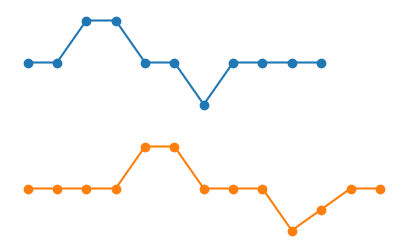

In [5]:
# lets see how our signals look like
plt.figure(figsize=(5,3))

plt.plot(np.arange(x.shape[0]), x+1.5, '-o')
plt.plot(np.arange(y.shape[0]), y-1.5, '-o')

plt.axis("off")


In [6]:
# define the distance matrix
N = x.shape[0]
M = y.shape[0]

dist_matrix = np.zeros((N,M))

for i in range(N):
    for j in range(M):
        dist_matrix[i,j] = abs(x[i] - y[j])

In [7]:
# Dynamic Time Warping
path, cost_matrix = dp(dist_matrix)
print("Alignment Cost: {:.4f}".format(cost_matrix[N-1, M-1]))
print("Normalized Alignment Cost: {:.4f}".format(cost_matrix[N-1, M-1]/(N+M)))

Alignment Cost: 0.5000
Normalized Alignment Cost: 0.0208


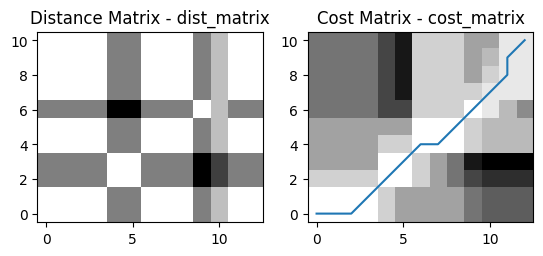

In [8]:
# lets visualize what just happened
plt.Figure(figsize=(5,4))
plt.subplot(121)
plt.title('Distance Matrix - dist_matrix')
plt.imshow(dist_matrix, cmap=plt.cm.binary, interpolation="nearest", origin='lower')
plt.subplot(122)
plt.title("Cost Matrix - cost_matrix")
plt.imshow(cost_matrix, cmap=plt.cm.binary, interpolation='nearest', origin='lower')

x_path, y_path = zip(*path)
plt.plot(y_path, x_path);

(-0.6000000000000001, 12.6, -2.75, 2.75)

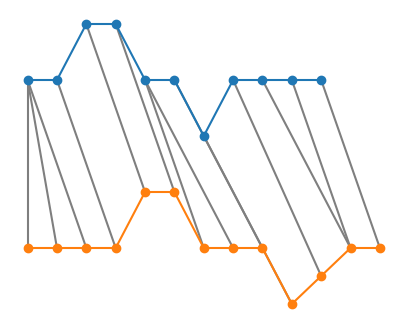

In [9]:
# lets see how they are aligned
plt.figure(figsize=(5,4))
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i]+1.5, y[y_j]-1.5], c='C7')

    # arange returns evenly spaced values within a given range:
plt.plot(np.arange(x.shape[0]), x+1.5, '-o')
plt.plot(np.arange(y.shape[0]), y-1.5, '-o')
plt.axis('off')

* Example 2

In [10]:
# define the shape of the signals x,y and visualize
x = np.array([0, 2, 0, 1, 0, 0])
y = np.array([0, 0, 0.5, 2, 0, 1, 0])

(0.7, 7.3, -1.75, 3.75)

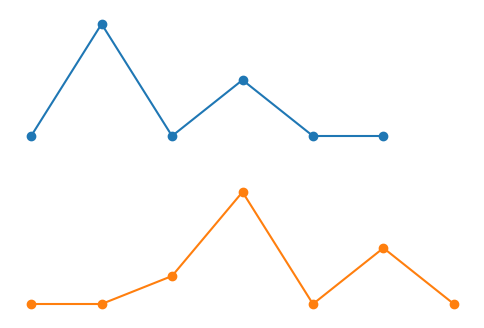

In [11]:
# visualize
plt.figure(figsize=(6,4))

plt.plot(np.arange(x.shape[0])+1, x+1.5, "-o")
plt.plot(np.arange(y.shape[0])+1, y-1.5, "-o")
plt.axis('off')

In [12]:
x.shape[0], y.shape[0]

(6, 7)

In [13]:
x

array([0, 2, 0, 1, 0, 0])

In [14]:
x.shape[0]+1, x+1.5

(7, array([1.5, 3.5, 1.5, 2.5, 1.5, 1.5]))

In [15]:
# define the distance matrix

# define the values for N and M
N = x.shape[0]
M = y.shape[0]

dist_matrix = np.zeros((N,M))

for i in range(N):
    for j in range(M):
        dist_matrix[i,j] = abs(x[i]-y[j])

In [16]:
# define the dynamic time warp
path, cost_matrix = dp(dist_matrix) # instantiate the path and cost function

# define the alignment cost
Alignment_Cost = cost_matrix[N-1, M-1]
Normalized_Algn_Cost = cost_matrix[N-1, M-1]/(N+M)

In [17]:
Alignment_Cost, Normalized_Algn_Cost

(0.5, 0.038461538461538464)

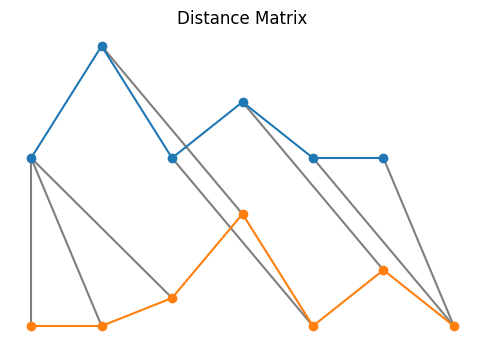

In [18]:
# visualize the path and cost_function
plt.figure(figsize=(6,4))
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j]-1.5], c='C7')
plt.axis('off')
plt.title('Distance Matrix')
plt.plot(np.arange(x.shape[0]), x+1.5, "-o")
plt.plot(np.arange(y.shape[0]), y-1.5, "-o")

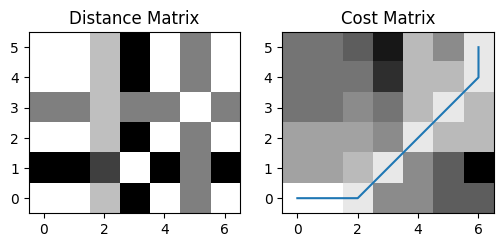

In [24]:
plt.figure(figsize=(6,4))
# plot a distance matrix subplot
plt.subplot(121)
plt.title("Distance Matrix")
plt.imshow(dist_matrix, cmap=plt.cm.binary, interpolation='nearest', origin='lower')
# plot a cost matrix subplot
plt.subplot(122)
plt.title("Cost Matrix")
plt.imshow(cost_matrix, cmap=plt.cm.binary, interpolation='nearest', origin='lower')
plt.plot(y_path, x_path)

`Example 3`

In [25]:
x = np.array([0, 0, 1, 1, 0, 0, -1, 0, 0, 0, 0])
y = np.array([0, 0, 0, 1, 1, 0, 0, 0, 0.5, 0, 0, 0, 0])

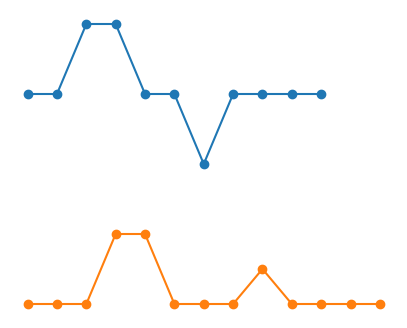

In [28]:
# visualize the signals
plt.figure(figsize=(5,4))
plt.axis('off')
plt.plot(np.arange(x.shape[0]), x+1.5, "-o")
plt.plot(np.arange(y.shape[0]), y-1.5, "-o")

In [36]:
# define the distance matrix
N = x.shape[0]
M = y.shape[0]

dist_matrix = np.zeros((N, M))
# dist_matrix
# N
# M

for i in range(N):
    for j in range(M):
        dist_matrix[i,j] = abs(x[i]-y[j])

In [41]:
# Define the DTW - path and cost function
path, cost_matrix = dp(dist_matrix)

# what is the alignment and normalized alignment cost
Alignment_Cost = cost_matrix[N-1, M-1]
Normalized_Algn_Cost = cost_matrix[N-1, M-1]/(N+M)
Alignment_Cost, Normalized_Algn_Cost

(1.5, 0.0625)

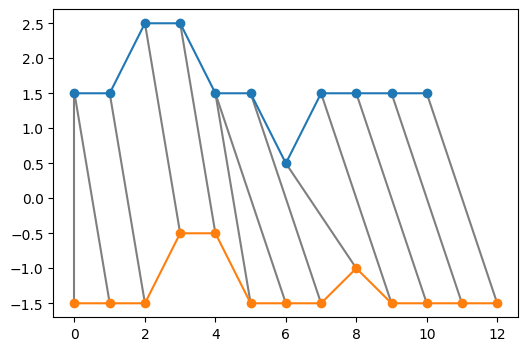

In [47]:
# plot the alignment
plt.figure(figsize=(6,4))
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j] - 1.5], c='C7')
plt.plot(np.arange(x.shape[0]), x+1.5, "-o")
plt.plot(np.arange(y.shape[0]), y-1.5, '-o')
# plt.axis('off')

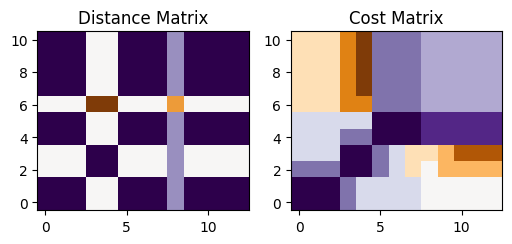

In [50]:
plt.figure(figsize=(6,4))
# distance matrix subplot
plt.subplot(121)
plt.imshow(dist_matrix, cmap=plt.cm.PuOr_r, interpolation='nearest', origin='lower')
plt.title('Distance Matrix')
# cost matrix subplot
plt.subplot(122)
plt.title('Cost Matrix')
plt.imshow(cost_matrix, cmap=plt.cm.PuOr_r, interpolation='nearest', origin='lower')